## 作业1 构造数据集X和Y，使得线性回归不止有一个解

解： Input X 有m个样本， Output Y 有n个输出， 所以当m<n, 线性回归不止一个解

   e.g.，1个样本，10个输出

## 作业2 证明L2正则化的极小值点为 $\omega = (X^TX + \lambda I)^{-1}X^TY$

解： 设 $\omega^*$ 是 $L(\omega)$ 的最优解，即 $\omega^* = (X^TX)^{-1}X^TY$
    
   假设 $L(\omega)$ 为二阶可导，将 $L(\omega)$ 在 $\omega^*$ 处进行二阶泰勒展开得：
    $\widehat{L}(\omega)=L(\omega^*)+\frac{1}{2}(\omega-\omega^*)^TH(\omega-\omega^*)$，其中 $H$ 为 $L(\omega)$ 在 $\omega^*$ 处的黑塞矩阵
   
   根据L2正则化：
   $\triangledown_\omega \widetilde{L}(\omega) = \triangledown_\omega \widehat{L}(\omega) + \triangledown_\omega \Omega (\omega) = H(\omega - \omega^*) + \lambda \omega$，其中 $\Omega (\omega) = \frac{1}{2}\lambda \vert\vert \omega \vert\vert^2$,
   
   设极小值点为$\omega^{**}$，则有：
   $H(\omega^{**} - \omega^*) + \lambda \omega^{**} = 0$
   
   解得：
   $\omega^{**} = (H + \lambda I)^{-1} H\omega^*$
   
   因为有 $H = X\Lambda X^T$,
   
   得：$\omega^{**} = (X^TX + \lambda I)^{-1}X^TY$

## 作业3 在NYSE数据上进行股票预测

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn

In [9]:
df = pd.read_csv('prices.csv')
df = df.loc[df['symbol'] == 'GE']
df = df.sort_values(by = 'date')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date') 
df['volume'] = df['volume']/1000000
df

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GE,15.220000,15.450000,15.150000,15.640000,67.0799
2010-01-05,GE,15.460000,15.530000,15.450000,15.670000,64.5506
2010-01-06,GE,15.530000,15.450000,15.440000,15.620000,55.4649
2010-01-07,GE,15.480000,16.250000,15.430000,16.480000,185.4723
2010-01-08,GE,16.309999,16.600000,16.270000,16.690001,115.1126
...,...,...,...,...,...,...
2016-12-23,GE,31.870001,31.879999,31.770000,31.940001,14.5597
2016-12-27,GE,31.889999,31.900000,31.850000,32.049999,15.6304
2016-12-28,GE,31.840000,31.700001,31.670000,31.969999,18.4444


In [10]:
def movingAverage(A,s = 5):
    l = len(A)
    B = []
    for i in range(0, s):
        B.append(A[i])
    for i in range(s, l):
        B.append(sum(A[i-s:i])/s)
    return B

def exponentialMovingAverage(A,alpha = 0.5):
    l = len(A)
    B = [A[0]]
    for i in range(1, l):
        B.append(alpha * A[i] + (1-alpha) * B[-1])
    return B

#取对应值
Open = df.iloc[:,1].values
Close = df.iloc[:,2].values
Low = df.iloc[:,3].values
High = df.iloc[:,4].values
Volume = df.iloc[:,5].values

#计算moving average
open_ma = movingAverage(Open)
close_ma = movingAverage(Close)
low_ma = movingAverage(Low)
high_ma = movingAverage(High)
volume_ma = movingAverage(Volume)

#计算exponential moving average
open_ema = exponentialMovingAverage(Open)
close_ema = exponentialMovingAverage(Close)
low_ema = exponentialMovingAverage(Low)
high_ema = exponentialMovingAverage(High)
volume_ema = exponentialMovingAverage(Volume)

df2 = df
df2['open_ma'] = open_ma
df2['close_ma'] = close_ma
df2['low_ma'] = low_ma
df2['high_ma'] = high_ma
df2['volume_ma'] = volume_ma

df2['open_ema'] = open_ema
df2['close_ema'] = close_ema
df2['low_ema'] = low_ema
df2['high_ema'] = high_ema
df2['volume_ema'] = volume_ema
df2

,symbol,open,close,low,high,volume,open_ma,close_ma,low_ma,high_ma,volume_ma,open_ema,close_ema,low_ema,high_ema,volume_ema
date,,,,,,,,,,,,,,,,
2010-01-04,GE,15.220000,15.450000,15.150000,15.640000,67.0799,15.220000,15.450,15.150,15.640000,67.07990,15.220000,15.450000,15.150000,15.640000,67.079900
2010-01-05,GE,15.460000,15.530000,15.450000,15.670000,64.5506,15.460000,15.530,15.450,15.670000,64.55060,15.340000,15.490000,15.300000,15.655000,65.815250
2010-01-06,GE,15.530000,15.450000,15.440000,15.620000,55.4649,15.530000,15.450,15.440,15.620000,55.46490,15.435000,15.470000,15.370000,15.637500,60.640075
2010-01-07,GE,15.480000,16.250000,15.430000,16.480000,185.4723,15.480000,16.250,15.430,16.480000,185.47230,15.457500,15.860000,15.400000,16.058750,123.056187
2010-01-08,GE,16.309999,16.600000,16.270000,16.690001,115.1126,16.309999,16.600,16.270,16.690001,115.11260,15.883749,16.230000,15.835000,16.374375,119.084394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,GE,31.870001,31.879999,31.770000,31.940001,14.5597,31.862000,31.974,31.782,32.088001,39.78094,31.910895,31.911718,31.802333,32.008500,22.165410
2016-12-27,GE,31.889999,31.900000,31.850000,32.049999,15.6304,31.932000,32.000,31.844,32.102001,28.29764,31.900447,31.905859,31.826167,32.029249,18.897905
2016-12-28,GE,31.840000,31.700001,31.670000,31.969999,18.4444,31.958000,31.996,31.872,32.112001,24.43336,31.870224,31.802930,31.748083,31.999624,18.671153


In [11]:
train = df2['2010': '2015']
test = df2['2016']

In [6]:
def simple_linear_regression(X, y): 
    num_sample, num_feat = X.shape
    X_cat = np.concatenate([X, np.ones((num_sample,1))], axis = 1)
    W_cat = np.linalg.inv(X_cat.T.dot(X_cat)).dot(X_cat.T).dot(y)
    return W_cat[:num_feat], W_cat[num_feat]

交叉验证最佳alpha值 0.0001
拟合参数:
截距 0.19944936217403963 ,
回归系数：
 [-0.07094012  0.67707656  0.06655642  0.29134564 -0.0034331   0.00297414
 -0.10328248  0.32310269 -0.06738083 -0.0034262  -0.20535534  0.24309102
 -0.25614121  0.09133591  0.006668  ]


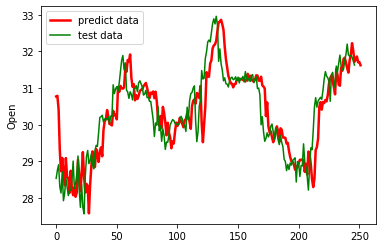

In [12]:
from sklearn.linear_model import RidgeCV

#选择训练集和测试集
X_train = train.iloc[:train.shape[0]-5,1:16]
Y_train = train.iloc[5:,1]

X_test = test.iloc[:train.shape[0]-5,1:16]
Y_test = test.iloc[5:,1]

#调用岭回归包
model = RidgeCV(alphas=[1e-8, 1e-6, 1e-4, 1e-2, 1], normalize = 'true')
model.fit(X_train,Y_train)#线性回归训练

print('交叉验证最佳alpha值',model.alpha_)
a  = model.intercept_#截距
b = model.coef_#回归系数
print("拟合参数:\n截距",a,",\n回归系数：\n",b)

Y_pred = model.predict(X_test)#对测试集数据，用predict函数预测

plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.ylabel('Open')
plt.show()#显示预测值与测试值曲线

## 作业4 求出$L(\omega) = \frac{1}{m}NLL$ 中$L(\omega)$对$\omega$的导数

解：$\frac{d\omega}{dL(\omega)} = \sum_{i=1}^m [(\frac{1}{h_w(x_i)})^{-\frac{1}{m}y_i} + (\frac{1}{1-h_w(x_i)})^{-\frac{1}{m}(1-y_i)}]$

## 作业5 用最大似然理解线性回归

1、请写出数据集$(X,Y)$的似然函数

解：$likelihood = [\prod^m_{i = 1} exp (\frac{-(h(x_i)-y_i)^2}{2\sigma^2}](\frac{1}{m\sqrt{2\pi}\sigma})^m$

$ = [\prod^m_{i = 1} exp (\frac{-(\omega x_i-y_i)^2}{2\sigma^2}](\frac{1}{m\sqrt{2\pi}\sigma})^m$

2、请推导从negative log likelihood导出线性回归的经验风险

解：$NLL = -[logC + \frac{-1}{2\sigma^2}\sum_{i=1}^m (h(x_i)-y_i)^2]$

$NLL_{min} = \frac{1}{2\sigma^2}\widehat{R}(h)$